In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter('ignore')

In [350]:
loan=pd.read_csv('/loan_table.csv')
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [351]:
borrower=pd.read_csv('/borrower_table.csv')
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [352]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   loan_id       101100 non-null  int64  
 1   loan_purpose  101100 non-null  object 
 2   date          101100 non-null  object 
 3   loan_granted  101100 non-null  int64  
 4   loan_repaid   47654 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [353]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   loan_id                                          101100 non-null  int64  
 1   is_first_loan                                    101100 non-null  int64  
 2   fully_repaid_previous_loans                      46153 non-null   float64
 3   currently_repaying_other_loans                   46153 non-null   float64
 4   total_credit_card_limit                          101100 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 6   saving_amount                                    101100 non-null  int64  
 7   checking_amount                                  101100 non-null  int64  
 8   is_employed                                      101100 non-null  int64  
 9   yearly_salary  

## Load and examine the data

In [354]:
# merge loan and borrower info
df=pd.merge(loan,borrower,on='loan_id',how='left')
df

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101095,734902,emergency_funds,2012-01-30,1,0.0,0,1.0,0.0,2400,0.40,553,2372,1,37000,56,3
101096,712467,business,2012-11-22,1,0.0,1,NaN,NaN,3100,0.68,367,1957,1,22700,59,5
101097,209268,other,2012-09-13,1,1.0,1,NaN,NaN,4600,0.50,1134,1621,1,35200,49,1
101098,779254,business,2012-02-08,1,1.0,0,1.0,0.0,6500,0.70,661,4333,1,19600,51,4


In [355]:
# check the missing values
df.isnull().sum()

loan_id                                                0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
dtype: int64

In [356]:
len(df[df['loan_granted']==0])

53446

The variable 'loan_repaid' is missing only for customers who are not granted a loan.

In [357]:
len(df[df['is_first_loan']==1])

54947

The variables of fully_repaid_previous_loans  and currently_repaying_other_loans are mssing only for the customers who are applying for the first loan

In [358]:
len(df[df['total_credit_card_limit']==0])

6972

'avg_percentage_credit_card_limit_used_last_year' is missing only for customers whose credit limit is zero

In [359]:
# create the new column of balance which is the sum of checking amount and saving amount.
df['balance']=df['checking_amount']+df['saving_amount']
# drop the checking_amount and saving_amount columns 
df=df.drop(['checking_amount','saving_amount'],axis=1)

In [360]:
# remove the loans which are not granted since they are not useful for profit calculation
df=df[df['loan_granted']==1]

In [361]:
# drop the useless deatures
df=df.drop(['loan_id','loan_granted','date'],axis=1)

### Exploratory Data Analysis and Visualization

In [362]:
df['loan_repaid'].value_counts()/len(df)

1.0    0.644353
0.0    0.355647
Name: loan_repaid, dtype: float64

There is about 64% loaner repaid their loans. 

In [363]:
# check the difference between repaid and non-repaid
df.groupby('loan_repaid').mean()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,is_employed,yearly_salary,age,dependent_number,balance
loan_repaid,,,,,,,,,,
0.0,0.532570,0.887276,0.598839,3459.352136,0.751311,0.791952,19893.114232,41.508320,4.233656,3095.128688
1.0,0.545919,0.911138,0.126659,5117.599166,0.672929,0.974891,34408.258972,41.533674,3.486843,6860.763857


#### Loan purpose

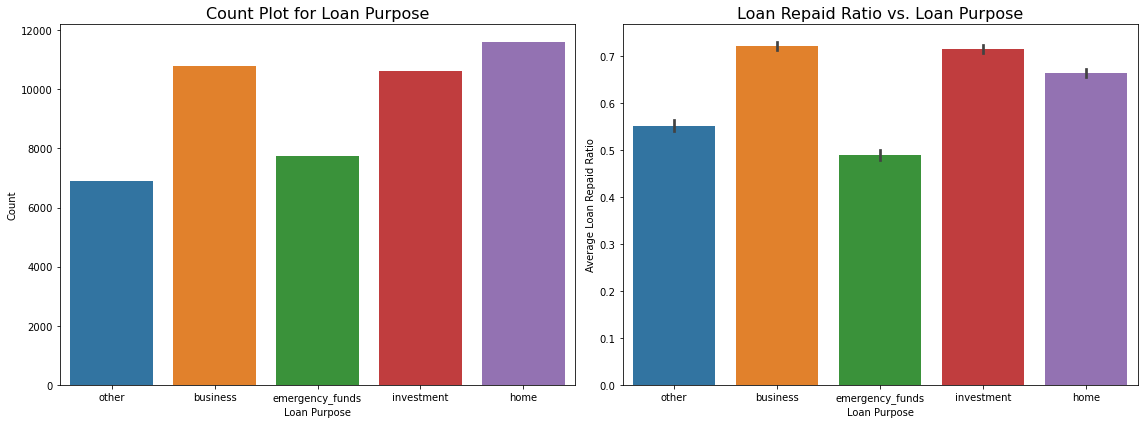

In [364]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='loan_purpose',data=df,ax=ax[0])
ax[0].set_xlabel('Loan Purpose')
ax[0].set_ylabel('Count')
ax[0].set_title('Count Plot for Loan Purpose',fontsize=16)


sns.barplot(x='loan_purpose',y='loan_repaid',data=df,ax=ax[1])
ax[1].set_xlabel('Loan Purpose')
ax[1].set_ylabel('Average Loan Repaid Ratio')
ax[1].set_title('Loan Repaid Ratio vs. Loan Purpose',fontsize=16)
plt.tight_layout()
plt.show()

#### Is first loan or not 

Text(0.5, 1.0, 'Loan Repaid Ratio vs. is_first_loan')

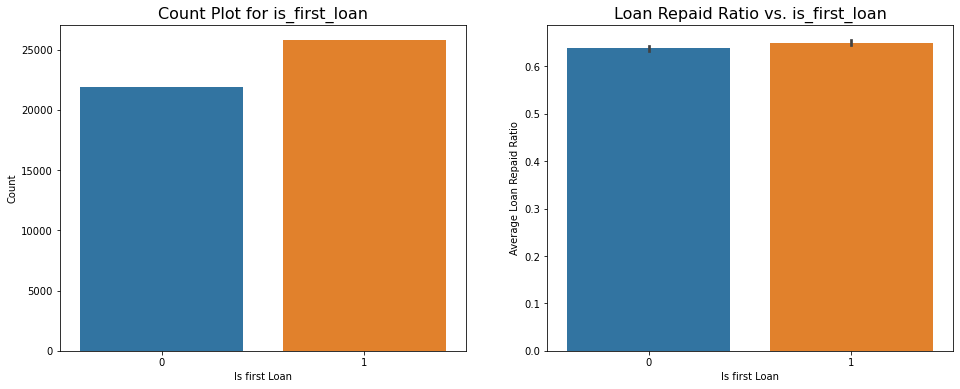

In [365]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='is_first_loan',data=df,ax=ax[0])
ax[0].set_xlabel('Is first Loan')
ax[0].set_ylabel('Count')
ax[0].set_title('Count Plot for is_first_loan',fontsize=16)

sns.barplot(x='is_first_loan',y='loan_repaid',data=df,ax=ax[1])
ax[1].set_xlabel('Is first Loan')
ax[1].set_ylabel('Average Loan Repaid Ratio')
ax[1].set_title('Loan Repaid Ratio vs. is_first_loan',fontsize=16)


#### fully_repaid_previous_loans

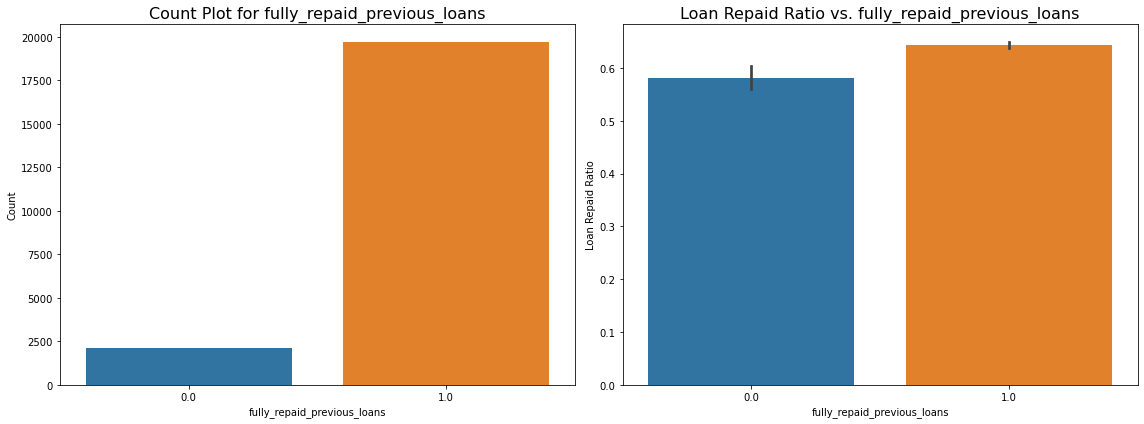

In [366]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='fully_repaid_previous_loans', data=df, ax=ax[0])
ax[0].set_xlabel('fully_repaid_previous_loans')
ax[0].set_ylabel('Count')
ax[0].set_title('Count Plot for fully_repaid_previous_loans', fontsize=16)

sns.barplot(x='fully_repaid_previous_loans', y='loan_repaid', data=df, ax=ax[1])
ax[1].set_xlabel('fully_repaid_previous_loans')
ax[1].set_ylabel('Loan Repaid Ratio')
ax[1].set_title('Loan Repaid Ratio vs. fully_repaid_previous_loans', fontsize=16)
plt.tight_layout()
plt.show()

#### currently_repaying_other_loans

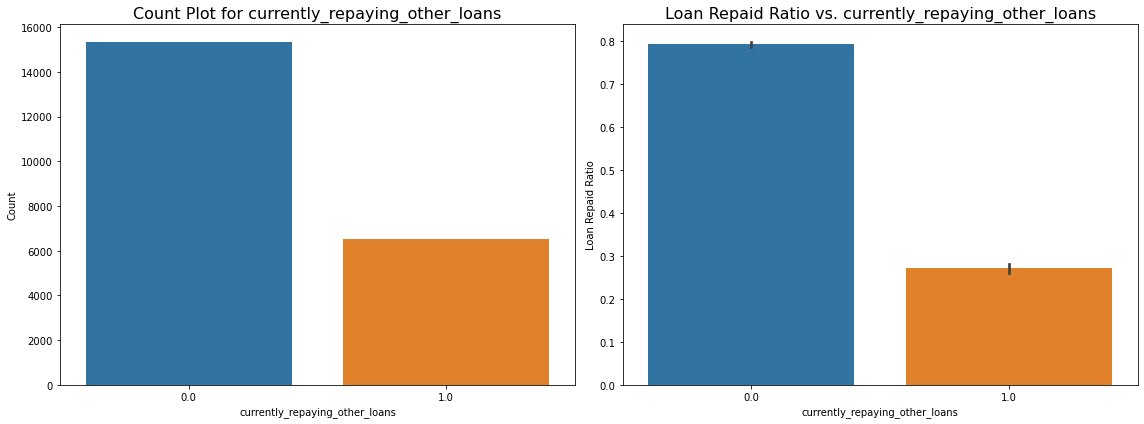

In [367]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='currently_repaying_other_loans', data=df, ax=ax[0])
ax[0].set_xlabel('currently_repaying_other_loans')
ax[0].set_ylabel('Count')
ax[0].set_title('Count Plot for currently_repaying_other_loans', fontsize=16)

sns.barplot(x='currently_repaying_other_loans', y='loan_repaid', data=df, ax=ax[1])
ax[1].set_xlabel('currently_repaying_other_loans')
ax[1].set_ylabel('Loan Repaid Ratio')
ax[1].set_title('Loan Repaid Ratio vs. currently_repaying_other_loans', fontsize=16)
plt.tight_layout()
plt.show()

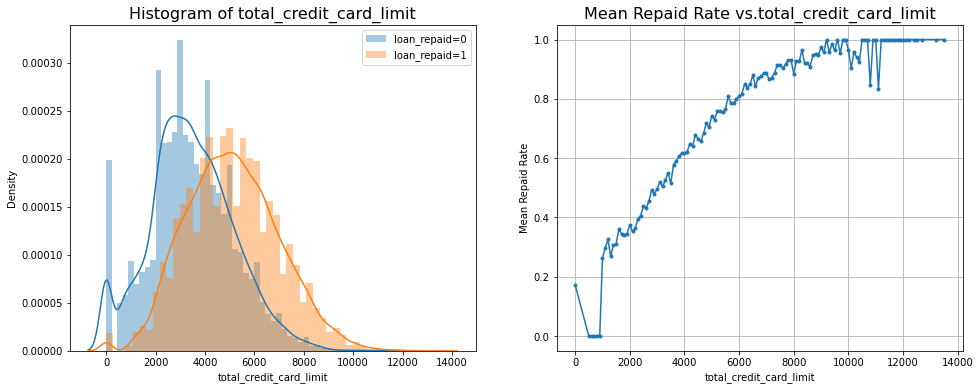

In [368]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(df[df['loan_repaid']==0]['total_credit_card_limit'],label='loan_repaid=0',ax=ax[0])
sns.distplot(df[df['loan_repaid']==1]['total_credit_card_limit'],label='loan_repaid=1',ax=ax[0])
ax[0].legend()
ax[0].set_title('Histogram of total_credit_card_limit',fontsize=16)

tc=df.groupby('total_credit_card_limit')['loan_repaid'].mean().reset_index()

ax[1].plot(tc['total_credit_card_limit'],tc['loan_repaid'],'.-')
ax[1].set_title('Mean Repaid Rate vs.total_credit_card_limit',fontsize=16)
ax[1].set_xlabel('total_credit_card_limit')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

#### avg_percentage_credit_card_limit_used_last_year

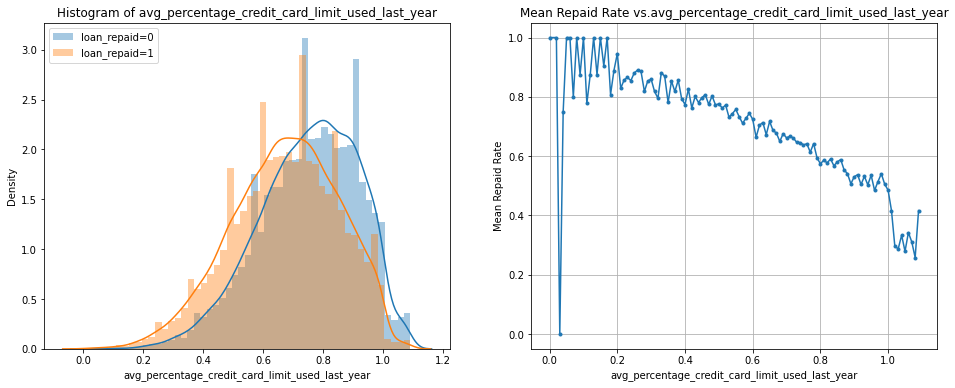

In [369]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(df[df['loan_repaid']==0]['avg_percentage_credit_card_limit_used_last_year'],label='loan_repaid=0',ax=ax[0])
sns.distplot(df[df['loan_repaid']==1]['avg_percentage_credit_card_limit_used_last_year'],label='loan_repaid=1',ax=ax[0])
ax[0].legend()
ax[0].set_title('Histogram of avg_percentage_credit_card_limit_used_last_year',fontsize=12)

ap=df.groupby('avg_percentage_credit_card_limit_used_last_year')['loan_repaid'].mean().reset_index()
ax[1].plot(ap['avg_percentage_credit_card_limit_used_last_year'],ap['loan_repaid'],'.-')
ax[1].set_title('Mean Repaid Rate vs.avg_percentage_credit_card_limit_used_last_year',fontsize=12)
ax[1].set_xlabel('avg_percentage_credit_card_limit_used_last_year')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()


#### Balance

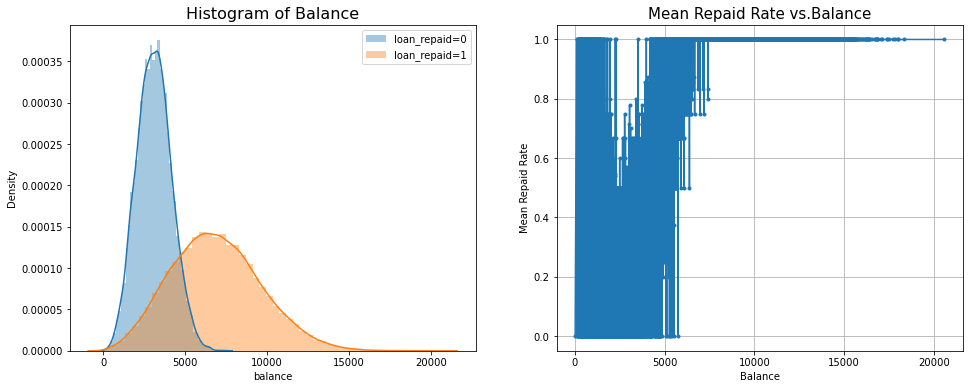

In [370]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(df[df['loan_repaid']==0]['balance'],label='loan_repaid=0',ax=ax[0])
sns.distplot(df[df['loan_repaid']==1]['balance'],label='loan_repaid=1',ax=ax[0])
ax[0].legend()
ax[0].set_title('Histogram of Balance',fontsize=16)

ba=df.groupby('balance')['loan_repaid'].mean().reset_index()
ax[1].plot(ba['balance'],ba['loan_repaid'],'.-')
ax[1].set_title('Mean Repaid Rate vs.Balance',fontsize=15)
ax[1].set_xlabel('Balance')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

#### is_employed

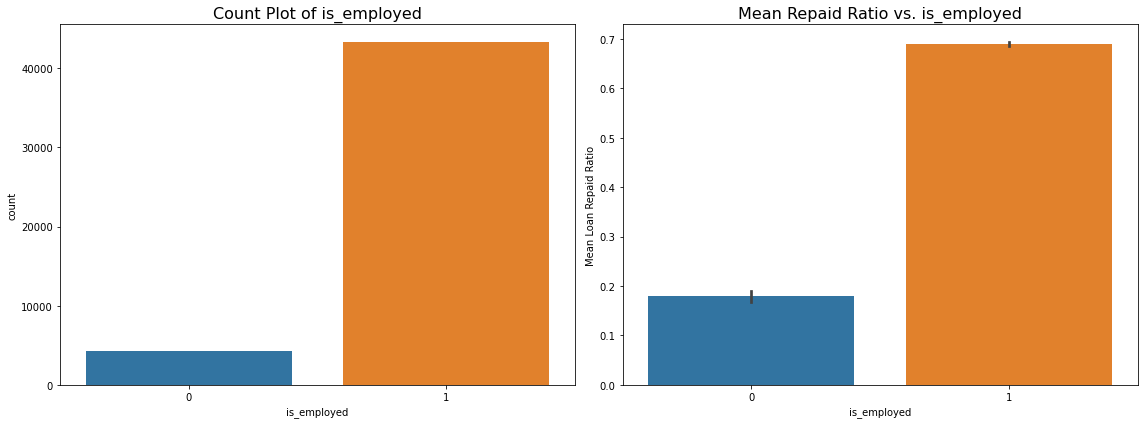

In [371]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='is_employed',data=df,ax=ax[0])
ax[0].set_title('Count Plot of is_employed',fontsize=16)

sns.barplot(x='is_employed',y='loan_repaid',data=df,ax=ax[1])
ax[1].set_title('Mean Repaid Ratio vs. is_employed',fontsize=16)
ax[1].set_xlabel('is_employed')
ax[1].set_ylabel('Mean Loan Repaid Ratio')
plt.tight_layout()
plt.show()

#### yearly_salary

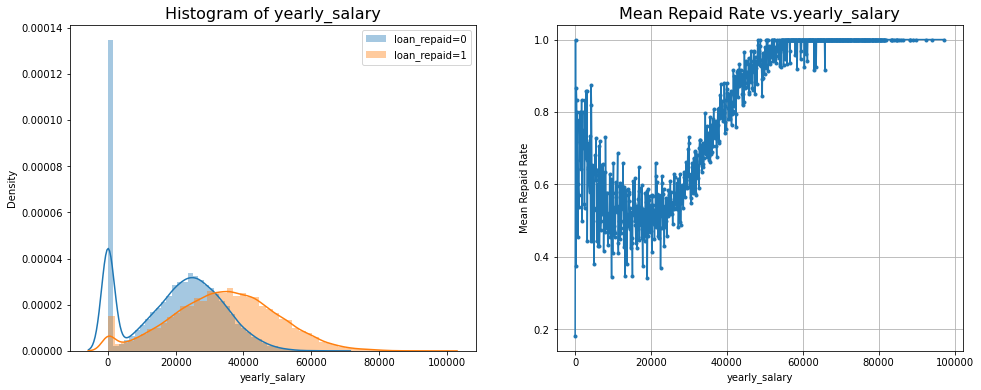

In [372]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(df[df['loan_repaid']==0]['yearly_salary'],label='loan_repaid=0',ax=ax[0])
sns.distplot(df[df['loan_repaid']==1]['yearly_salary'],label='loan_repaid=1',ax=ax[0])
ax[0].legend()
ax[0].set_title('Histogram of yearly_salary',fontsize=16)

ys=df.groupby('yearly_salary')['loan_repaid'].mean().reset_index()
ax[1].plot(ys['yearly_salary'],ys['loan_repaid'],'.-')
ax[1].set_title('Mean Repaid Rate vs.yearly_salary',fontsize=16)
ax[1].set_xlabel('yearly_salary')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()


#### age

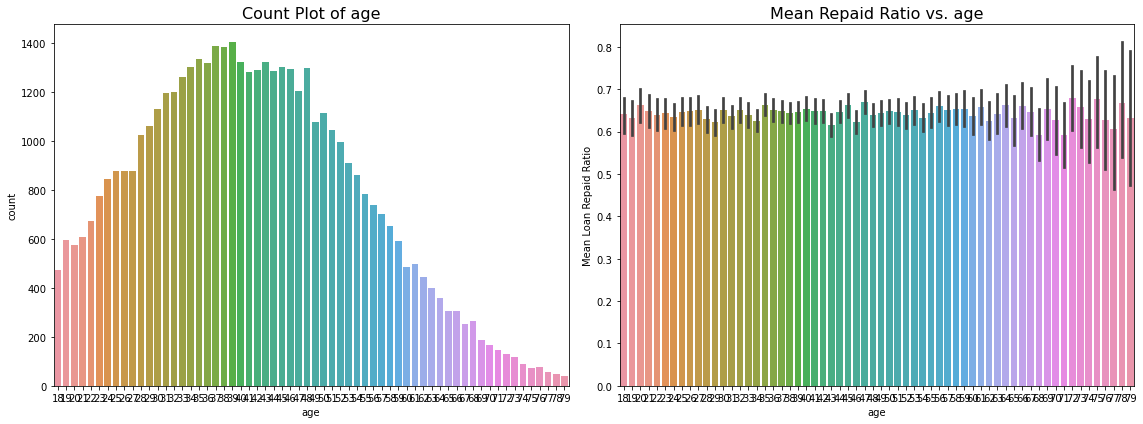

In [373]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='age',data=df,ax=ax[0])
ax[0].set_title('Count Plot of age',fontsize=16)

sns.barplot(x='age',y='loan_repaid',data=df,ax=ax[1])
ax[1].set_title('Mean Repaid Ratio vs. age',fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean Loan Repaid Ratio')
plt.tight_layout()
plt.show()

#### dependent_number

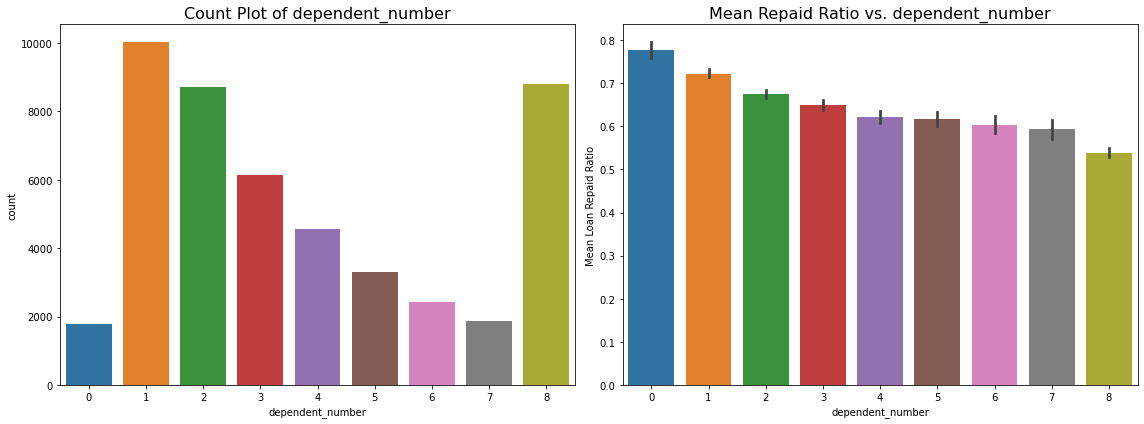

In [374]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='dependent_number',data=df,ax=ax[0])
ax[0].set_title('Count Plot of dependent_number',fontsize=16)

sns.barplot(x='dependent_number',y='loan_repaid',data=df,ax=ax[1])
ax[1].set_title('Mean Repaid Ratio vs. dependent_number',fontsize=16)
ax[1].set_xlabel('dependent_number')
ax[1].set_ylabel('Mean Loan Repaid Ratio')
plt.tight_layout()
plt.show()

Based on the visulization, we can conclude:
1. The most common loan purpose for poeple who did repay is business and investment, while people who did not repay is emergency_funds
2. is_first_loan, previous_repaid and age not does not make a significant difference. 

### Correlation heatmap

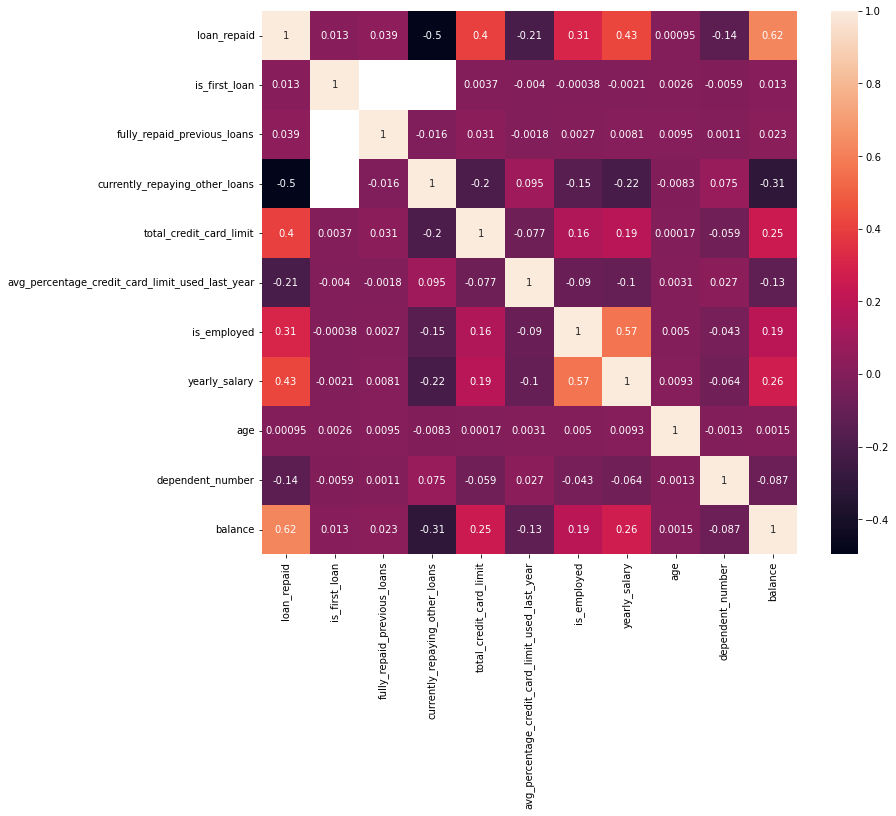

In [375]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Feature Engineering 

##### one hot encoding loan_purpose

In [376]:
df=pd.get_dummies(df,columns=['loan_purpose'])

##### Impute missing values 

In [377]:
# since the variables are missing at non-random, we will impute them with empirical numbers, e.g. 999

df=df.fillna({'fully_repaid_previous_loans':-1,'currently_repaying_other_loans':-1})
df=df.fillna({'avg_percentage_credit_card_limit_used_last_year':999})


#####  Convert to categorical features 

In [378]:
categorical_feature=['loan_repaid','is_first_loan','fully_repaid_previous_loans','currently_repaying_other_loans','is_employed'
                     ,'loan_purpose_business','loan_purpose_emergency_funds','loan_purpose_home','loan_purpose_investment','loan_purpose_other']               

df[categorical_feature]=df[categorical_feature].astype('category')

## Model building

In [379]:
# Train-test splitting 
X=df.drop('loan_repaid',axis=1)
target=df['loan_repaid']

X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.3,random_state=42)

In [380]:
from sklearn import metrics
def evaluate_model(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_pred_prob=model.predict_proba(x_test)[:,1]
    # calculate accuracy, precision, recall, f1-score
    acc=metrics.accuracy_score(y_test,y_pred)
    prec=metrics.precision_score(y_test,y_pred)
    rec=metrics.recall_score(y_test,y_pred)
    f1=metrics.f1_score(y_test,y_pred)
    # calculate AUC
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
    auc=round(metrics.roc_auc_score(y_test,y_pred_prob),4)
    # calculate log loss score 
    logloss=metrics.log_loss(y_test,y_pred_prob)
    # display confussion matrix
    cm=metrics.confusion_matrix(y_test,y_pred)
    
    return {'acc':acc,'prec':prec,'rec':rec,'f1':f1,'auc':auc,'log_loss':logloss,'cm':cm,'fpr':fpr,'tpr':tpr} 

### Logistic regression

In [381]:
lg=LogisticRegression()
param_grid={'C':0.001*10**(np.arange(0, 1.01, 0.01)*3)} 
lg_gridcv=GridSearchCV(lg,param_grid,cv=5,scoring='roc_auc',n_jobs=-1)
grid_search=lg_gridcv.fit(X_train,y_train)
lr = grid_search.best_estimator_

lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize

In [382]:
lg_eval=evaluate_model(lr,X_test,y_test)

### Random forest

In [383]:
rf=RandomForestClassifier(random_state=1,n_jobs=-1)
parameters = {
    "max_features": [2, 3, 4],
    "min_samples_split": [2, 3, 4],
    "max_depth": range(5, 10)
}

# Run Grid Search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           scoring='roc_auc',
                           n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)
rf=grid_search.best_estimator_

In [384]:
rf_eval=evaluate_model(rf,X_test,y_test)

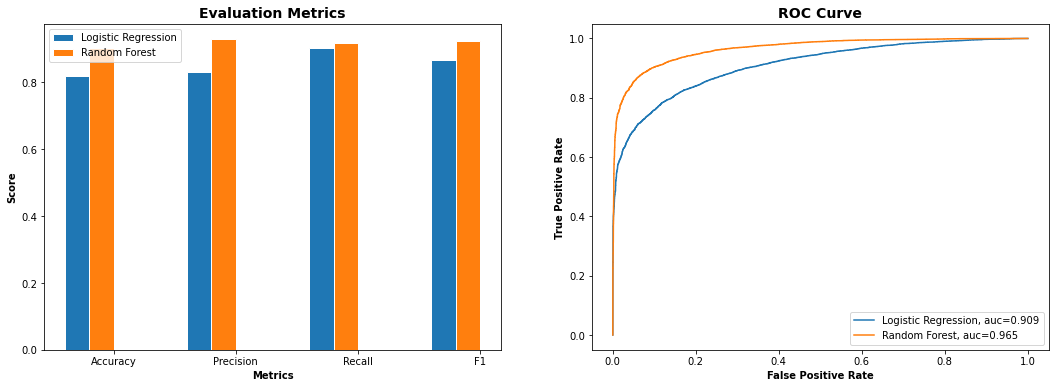

In [385]:
# initialize figure with two plots
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,6))

# first plot
barWidth=0.2
lg_score=[lg_eval['acc'],lg_eval['prec'],lg_eval['rec'],lg_eval['f1']]
rf_score=[rf_eval['acc'],rf_eval['prec'],rf_eval['rec'],rf_eval['f1']]

r1=np.arange(len(lg_score))
r2=[x+barWidth for x in r1]
ax[0].bar(r1,lg_score,width=barWidth,edgecolor='white',label='Logistic Regression')
ax[0].bar(r2,rf_score,width=barWidth,edgecolor='white',label='Random Forest')

ax[0].set_xlabel('Metrics',fontweight='bold')
ax[0].set_xticks([r + (barWidth * 1.5) for r in range(len(lg_score))], )
labels=['Accuracy', 'Precision', 'Recall', 'F1']
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Score',fontweight='bold')
ax[0].set_title('Evaluation Metrics',fontsize=14,fontweight='bold')
ax[0].legend()

# second plot
ax[1].plot(lg_eval['fpr'],lg_eval['tpr'],label='Logistic Regression, auc={:.3f}'.format(lg_eval['auc']))
ax[1].plot(rf_eval['fpr'],rf_eval['tpr'],label='Random Forest, auc={:.3f}'.format(rf_eval['auc']))
ax[1].set_title('ROC Curve',fontsize=14,fontweight='bold')
ax[1].set_xlabel('False Positive Rate',fontweight='bold')
ax[1].set_ylabel('True Positive Rate',fontweight='bold')
ax[1].legend()

plt.show()

Random forest will be chosen as our model.

### Question 1 

In [396]:
# profit from the bank model
loan_paid = y_test.astype(int).values
bank_profit = np.sum(loan_paid * 2 - 1)
bank_profit

4141

In [411]:
pred=rf.predict_proba(X_test)[:,1]
thresholds=list(np.arange(0,1,0.01)) 

def profit_model(threshold):
    profit=0
    p=[]
    for t in threshold:
        for j in range(len(y_test)):
            if pred[j]>=t:
                profit+=1
            else:
                profit-=1
        p.append(profit)
        profit=0
    return p



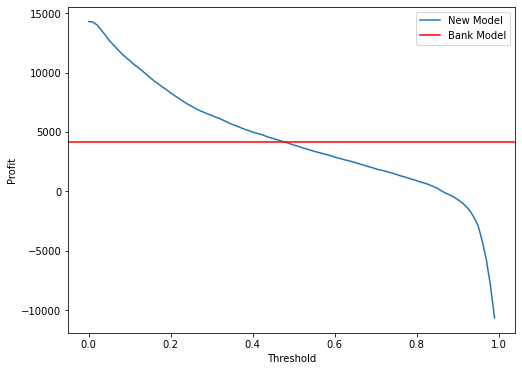

In [412]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(thresholds,profit_model(thresholds),label='New Model')
ax.axhline(y=bank_profit, label='Bank Model',color='red')
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Profit')
plt.show()

### Question 2 

Text(0.5, 1.0, 'Random Forest Feature Importances')

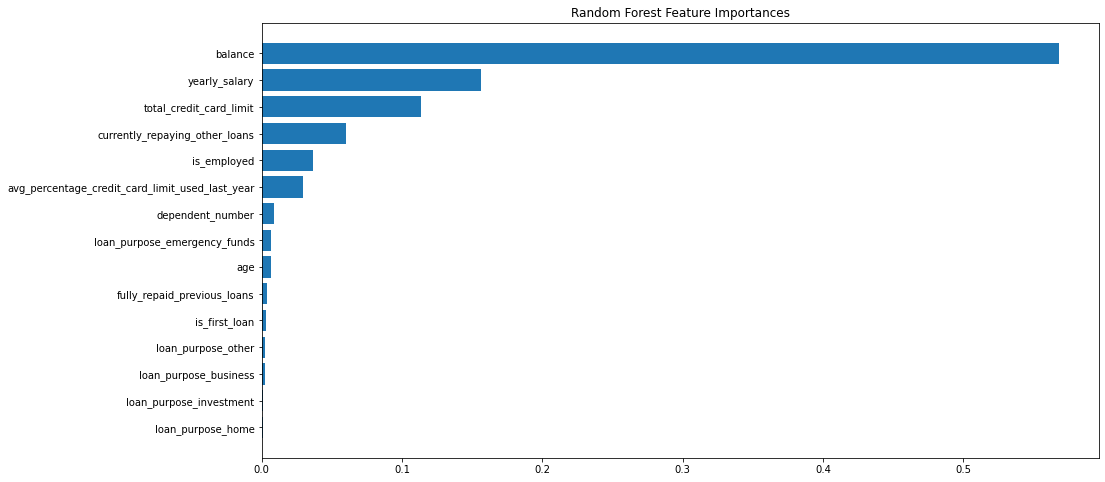

In [413]:
plt.figure(figsize=(15,8))
sort_index=np.argsort(rf.feature_importances_)
plt.barh(X_train.columns[sort_index],rf.feature_importances_[sort_index])
plt.title('Random Forest Feature Importances')

From the variable importance plot, Variables 'balance','yearly_salary' and 'total_credit_card_limit have much more importance compared with other variables.